In [416]:
import numpy as np
import scipy as sp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

In [417]:
def fire(dimension, n_cells, delta, Solution, fire_starting_point, fire_radius):
    #check dimensions:
    if dimension == 1:
        ST, SG = np.split(Solution, 2) #Split the solution into the two components
        fire_starting_index_x = int(fire_starting_point / delta) #Find the index of the starting point of the fire
        X = np.arange(n_cells+1) #Create an array of the x-values
        distance = np.abs(X - fire_starting_index_x) #Calculate the distance from the starting point in which the fire should be active
        mask = distance <= fire_radius/delta #Create a mask for the cells that should be affected by the fire
        ST[mask] = 0.0 #Set the Tree concentration of the cells affected by the fire to 0
        SG[mask] = 0.0 #Set the gras concentration of the cells affected by the fire to 0
        return np.concatenate((ST, SG))
    elif dimension == 2:
        n_x, n_y = n_cells
        dx, dy = delta
        ST, SG = np.split(Solution, 2)
        fire_starting_index_x = int(fire_starting_point[0] / dx)
        fire_starting_index_y = int(fire_starting_point[1] / dy)
        X, Y = np.meshgrid(np.arange(n_x+1), np.arange(n_y+1))
        distance = np.hypot(X - fire_starting_index_x, Y - fire_starting_index_y)
        mask = np.logical_and(distance <= fire_radius/dx, distance >= 0)
        ST[mask] = 0
        SG[mask] = 0
        return np.concatenate((ST, SG))
    else:
        print("Error: Something went wrong with the dimensions in the fire function.")

In [ ]:
#Initialisation of the parameters
def Initialisation1D():
    dimension = 1
    p = [0.083, 0.014, 0.638, 0.042, 8, 0.278]
    #p_1 = 0.083; p_2 = 0.014; p_3 = 0.638; p_4 = 0.042; p_5 = 8; p_6 = 0.278
    L = 10000
    n = 100
    x_min = 0
    x_max = L
    delta = (x_max - x_min) / n
    return dimension, p, L, n, x_min, x_max, delta

def Initialisation2D():
    dimension = 1
    p_1 = 0.083; p_2 = 0.014; p_3 = 0.638; p_4 = 0.042; p_5 = 8; p_6 = 0.278
    L = 10000
    n = 100
    xy_min = [0, 0]
    xy_max = [L, L]
    delta = np.zeros(dimension)
    delta[0] = (xy_max[0] - xy_min[0]) / n
    delta[1] = (xy_max[1] - xy_min[1]) / n
    return dimension, p_1, p_2, p_3, p_4, p_5, p_6, L, n, xy_min, xy_max, delta



c:\Users\leolu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Converged after 12 iterations.


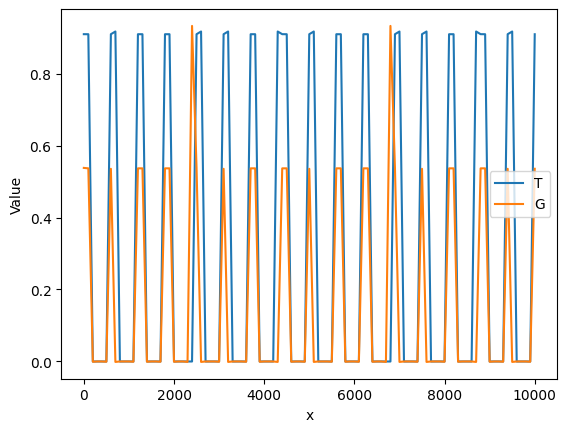

In [ ]:
#Initialisation of the parameters
def Initialisation1D():
    dimension = 1
    p[0] = 0.083; p_2 = 0.014; p_3 = 0.638; p_4 = 0.042; p_5 = 8; p_6 = 0.278
    L = 10000
    n = 100
    x_min = 0
    x_max = L
    delta = (x_max - x_min) / n
    return dimension, p_1, p_2, p_3, p_4, p_5, p_6, L, n, x_min, x_max, delta

def Initialisation2D():
    dimension = 1
    p_1 = 0.083; p_2 = 0.014; p_3 = 0.638; p_4 = 0.042; p_5 = 8; p_6 = 0.278
    L = 10000
    n = 100
    xy_min = [0, 0]
    xy_max = [L, L]
    delta = np.zeros(dimension)
    delta[0] = (xy_max[0] - xy_min[0]) / n
    delta[1] = (xy_max[1] - xy_min[1]) / n
    return dimension, p_1, p_2, p_3, p_4, p_5, p_6, L, n, xy_min, xy_max, delta

def f(T, G, p, delta, n):
    
    # Generate the system of equations in T
    equations_T = [T[i] * (1 - T[i]) - p[0] * T[i] + (T[i+1] - 2 * T[i] + T[i-1]) / delta_x**2 - p[1] * T[i] * G[i] for i in range(1, n)]
    i = 0
    equations_T.insert(0, T[i] * (1 - T[i]) - p[0] * T[i] + (2 * T[i+1] - 2 * T[i]) / delta_x**2 - p[1] * T[i] * G[i])  # Equation for i = 0    
    i = n
    equations_T.append(T[i] * (1 - T[i]) - p[0] * T[i] + (2 * T[i-1] - 2 * T[i]) / delta_x**2 - p[1] * T[i] * G[i])  # Equation for i = n      

    # Generate the system of equations in G
    equations_G = [p[2] * G[i] * (1 - G[i]) - p[3] * G[i] + p[4] * (G[i+1] - 2 * G[i] + G[i-1]) / delta_x**2 - p[5] * T[i] * G[i] for i in range(1, n)]
    i = 0
    equations_G.insert(0, p[2] * G[i] * (1 - G[i]) - p[3] * G[i] + p[4] * (2 * G[i+1] - 2 * G[i]) / delta_x**2 - p[5] * T[i] * G[i])  # Equation for i = 0    
    i = n
    equations_G.append(p[2] * G[i] * (1 - G[i]) - p[3] * G[i] + p[4] * (-2 * G[i] + 2 * G[i-1]) / delta_x**2 - p[5] * T[i] * G[i])  # Equation for i = n      
    return equations_T + equations_G

def J_eq_1_T(T, G):
    # Generate the Jacobian matrix
    jac_matrix = np.zeros((n+1, n+1))
   
    for i in range(1, n):
        jac_matrix[i, i] = 1 - 2 * T[i] - p_1 - 2 / delta_x**2 - p_2 * G[i]
        jac_matrix[i, i-1] = 1 / delta_x**2
        jac_matrix[i, i+1] = 1 / delta_x**2

    # Jacobian for i = 0
    i = 0
    jac_matrix[i, i+1] = 2 / delta_x**2
    jac_matrix[i, i] = 1 - 2 * T[i] - p_1 - 2 / delta_x**2 - p_2 * G[i]
   
    # Jacobian for i = n
    i = n
    jac_matrix[i, i-1] = 2 / delta_x**2
    jac_matrix[i, i] = 1 - 2 * T[i] - p_1 - 2 / delta_x**2 - p_2 * G[i]

    return jac_matrix

def J_eq_1_G(T, G):
    # Generate the Jacobian matrix
    jac_matrix = np.zeros((n+1, n+1))
    for i in range(0, n+1):
        jac_matrix[i, i] = -p_2 * T[i]
    return jac_matrix

def J_eq_2_T(T, G):
    # Generate the Jacobian matrix
    jac_matrix = np.zeros((n+1, n+1))
    for i in range(0, n+1):
        jac_matrix[i, i] = -p_6 * G[i]
    return jac_matrix

def J_eq_2_G(T, G):
    # Generate the Jacobian matrix
    jac_matrix = np.zeros((n+1, n+1))
   
    for i in range(1, n):
        jac_matrix[i, i] = p_3 - 2 * p_3 * G[i] - p_4 - 2 * p_5 / delta_x**2 - p_6 * T[i]
        jac_matrix[i, i-1] = p_5 / delta_x**2
        jac_matrix[i, i+1] = p_5 / delta_x**2

    # Jacobian for i = 0
    i = 0
    jac_matrix[i, i+1] = (2 * p_5) / delta_x**2
    jac_matrix[i, i] = p_3 - 2 * p_3 * G[i] - p_4 - 2 * p_5 / delta_x**2 - p_6 * T[i]
   
    # Jacobian for i = n
    i = n
    jac_matrix[i, i-1] = (2 * p_5) / delta_x**2
    jac_matrix[i, i] = p_3 - 2 * p_3 * G[i] - p_4 - 2 * p_5 / delta_x**2 - p_6 * T[i]

    return jac_matrix

def J(T, G):
    Jac_eq_1_T = J_eq_1_T(T, G)
    Jac_eq_1_G = J_eq_1_G(T, G)
    Jac_eq_2_T = J_eq_2_T(T, G)
    Jac_eq_2_G = J_eq_2_G(T, G)

    # Create a larger matrix to hold the combined result
    Jac = np.zeros((2 * (n+1), 2 * (n+1)))
   
    # Insert matrices into appropriate positions
    Jac[:n+1, :n+1] = Jac_eq_1_T  # Left upper part
    Jac[:n+1, n+1:] = Jac_eq_1_G  # Right upper part
    Jac[n+1:, :n+1] = Jac_eq_2_T  # Left lower part
    Jac[n+1:, n+1:] = Jac_eq_2_G  # Right lower part
   
    return Jac

def newton_raphson_system(f, J, initial_guess, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        # Split initial guess into T and G
        T, G = np.split(initial_guess, 2)

        # Evaluate the system of equations and the Jacobian at the current point
        f_val = np.array(f(T, G))
        J_val = np.array(J(T, G))

        # Solve the linear system to get the update
        delta_T_G = spsolve(J_val, -f_val)
       
        # Update the solution
        initial_guess += delta_T_G
        #print(delta_T_G)
        # Check for convergence
        if np.linalg.norm(delta_T_G) < tol:
            print('Converged after', i + 1, 'iterations.')
            return initial_guess  # Return the solution
   
    raise RuntimeError("Newton-Raphson method did not converge within the maximum number of iterations.")

def initial_guess_func(x_min, x_max, n):
    # Initial guess
    x = np.linspace(x_min, x_max, n+1)

    initial_guess = np.zeros(2*(n + 1))
    for i in range(0,n+1):
        initial_guess[i] = 0.909*np.cos(i)
    
    for i in range(n+1, 2*(n+1)):
        initial_guess[i] = 0.538*np.cos(i)
    return initial_guess
   
def plot_solution1D(T_solution, G_solution, n, x_min, x_max):
    x = np.linspace(x_min, x_max, n+1)
    plt.figure()
    plt.plot(x, T_solution, label='T')
    plt.plot(x, G_solution, label='G')
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

def simulation_with_fire(Initialisation1D, Initialisation2D, plot_solution1D, dimension = 1):
    #Check dimension:
    if dimension == 1:
        #Initialisation of the parameters
        dimension, p_1, p_2, p_3, p_4, p_5, p_6, L, n, x_min, x_max, delta = Initialisation1D()
        #Initial guess
        initial_guess = initial_guess_func(x_min, x_max, n)
        #Solve the system
        solution = newton_raphson_system(f, J, initial_guess)
        #Split solution into T and G
        T_solution, G_solution = np.split(solution, 2)
        #Plot the results
        plot_solution1D(T_solution, G_solution, n, x_min, x_max)
        pass


    elif dimension == 2:
        pass

    else:
        print("Error: Something went wrong with the dimensions in the simulation_with_fire function.")

simulation_with_fire(Initialisation1D, Initialisation2D, plot_solution1D)

